#Preamble

In [ ]:
pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 292 kB 5.2 MB/s 
     |████████████████████████████████| 98 kB 7.2 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84413 sha256=76e74ad2cb777d15aae7a3248146dc51ac3d60921e5d2ceae70584e6695d7cba
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
Successfully built lmfit


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import argrelmax
from lmfit.models import GaussianModel
from scipy.integrate import quad
import tkinter as tk
from scipy import interpolate
#%matplotlib qt

In [ ]:
matplotlib.rcParams['figure.dpi'] = 100

In [ ]:
def fitparms(x,y):
    mod = GaussianModel()
    pars = mod.guess(y, x=x)
    out = mod.fit(y, pars, x=x)
    print(out.fit_report())
    
    for name, param in out.params.items():
        if (name=='amplitude'):a=param.value
        elif(name=='center'):m=param.value
        elif(name=='sigma'):std=param.value
    
    return a,m,std

In [ ]:
def fit(x,y,a,m,std):
    xn=np.linspace(min(x),max(x),10000)
    yn=g(xn,m,std,a)
    ymax=max(yn)
    mi=np.where(yn==ymax)[0]
    return xn,yn,mi

In [ ]:
def g(x,mean,sigma,height):
    y=height*(np.exp(-1*(x-mean)**2/(2*sigma**2)))/(sigma*np.sqrt(2*np.pi))
    return y

In [ ]:
def Energy(x,m,s):
    return (m*x+s)

In [ ]:
def best_fit(x,y):        #defining function
    x_sq=0                #initializing values as 0
    xy=0
    y_sum=0
    x_sum=0
    n=len(y)              #n is length of the array y
    for i in range(0,n):
        a=(y[i]*x[i])
        xy=xy+a           #Calculating and adding the product of both arrays
        a=x[i]**2
        x_sq=x_sq+a      #Calculating and adding the product of square of array x
        y_sum=y_sum + y[i]  #Summing the values in array y
        x_sum=x_sum + x[i]  #Summing the values in array x
    m = ((n*xy) - (y_sum * x_sum)) / ((x_sq * n) - (x_sum**2))   #Calculating the value of slope
    c = ((x_sum * xy) - (x_sq * y_sum)) / ((x_sum**2) - (n * x_sq))   #Calculating the value of y intercept
    return (m,c)

In [ ]:
def latticeconsts(h, k, l, d):
  4*(h**2 + h*k + k**2)/(3*a**2) + l**2/c**2 - 1/(d**2)
  return a, c

In [ ]:
wavelength = 1.54*10**(-10)
K = 0.89
mnconc = [0, 2, 5, 10]

#ZnO

In [ ]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving xrdab.txt to xrdab.txt


In [ ]:
df=pd.read_csv("xrdab.txt", sep='\s+', header=1, names=['2theta','zno','znoNi2','ZnONi5','ZnONi10','NiO'])
print(df)

      2theta  zno  znoNi2  ZnONi5  ZnONi10   NiO
0      30.02  3.0     3.0     3.0      7.0  17.0
1      30.04  1.0     4.0     5.0      2.0  20.0
2      30.06  2.0     5.0     5.0      5.0  18.0
3      30.08  4.0     2.0     4.0      6.0  20.0
4      30.10  1.0     6.0     4.0      5.0  18.0
...      ...  ...     ...     ...      ...   ...
2495    5.00  NaN     NaN     NaN      NaN   NaN
2496    2.00  NaN     NaN     NaN      NaN   NaN
2497    5.00  NaN     NaN     NaN      NaN   NaN
2498    2.00  NaN     NaN     NaN      NaN   NaN
2499    2.00  NaN     NaN     NaN      NaN   NaN

[2500 rows x 6 columns]


In [ ]:
Ch=np.asarray(df['2theta'])
c=np.asarray(df['zno'])
# plt.plot(Ch,c)

In [ ]:
mi = argrelmax(c)[0] # max index
Chpl=[]
cp=[]
ip=[]
for i in range(0,len(mi)):
    cp.append(c[mi[i]])
cp.sort()
cpl=cp[len(cp)-3:len(cp)]

for i in range(0,len(cpl)):
    j=np.where(c==cpl[i])[0][0]
    ip.append(j)
    Chpl.append(Ch[j])

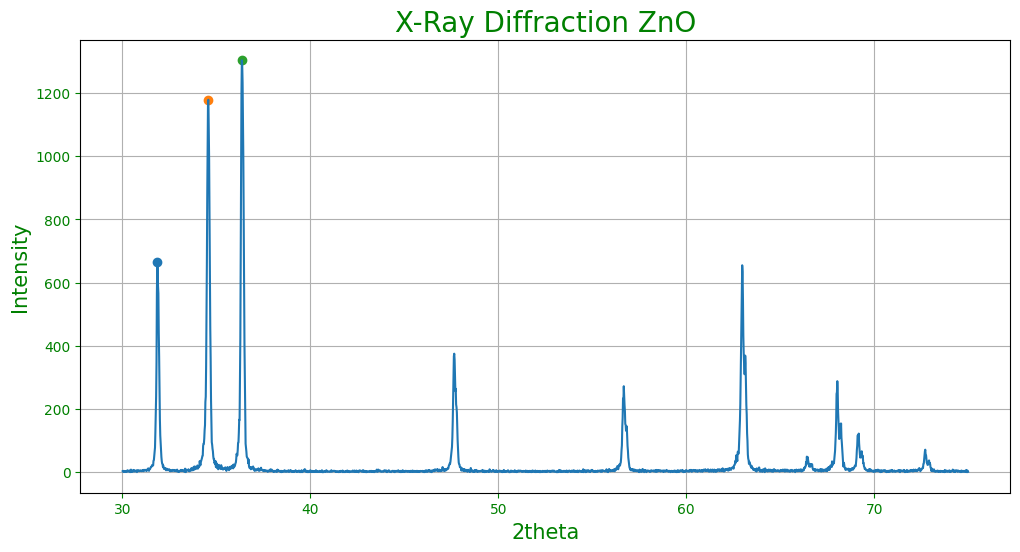

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.xaxis.label.set_color('green')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('green')          #setting up Y-axis label color to blue
ax.set_title('X-Ray Diffraction ZnO',color='green',fontsize=20)
ax.tick_params(axis='x', colors='green')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='green')  #setting up Y-axis tick color to black
plt.xlabel('2theta',fontsize=15)
plt.ylabel('Intensity',fontsize=15)
plt.plot(Ch,c)
for i in range(0, len(Chpl)):
    plt.scatter(Chpl[i],cpl[i])
plt.grid()

In [ ]:
Ch1=Ch[ip[0]-50:ip[0]+50]
c1=c[ip[0]-50:ip[0]+50]

Ch2=Ch[ip[1]-50:ip[1]+50]
c2=c[ip[1]-50:ip[1]+50]

Ch3=Ch[ip[2]-50:ip[2]+50]
c3=c[ip[2]-50:ip[2]+50]

In [ ]:
amp1,centre1,std1=fitparms(Ch1,c1)
Ch1n,c1n,mi1=fit(Ch1,c1,amp1,centre1,std1)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 33671.2986
    reduced chi-square = 347.126790
    Akaike info crit   = 587.923089
    Bayesian info crit = 595.738600
[[Variables]]
    amplitude:  111.981987 +/- 1.60265391 (1.43%) (init = 139.02)
    center:     31.8863142 +/- 0.00114979 (0.00%) (init = 31.89)
    sigma:      0.06957438 +/- 0.00114977 (1.65%) (init = 0.07)
    fwhm:       0.16383514 +/- 0.00270750 (1.65%) == '2.3548200*sigma'
    height:     642.109213 +/- 9.18969302 (1.43%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


In [ ]:
amp2,centre2,std2=fitparms(Ch2,c2)
Ch2n,c2n,mi2=fit(Ch2,c2,amp2,centre2,std2)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 94682.1826
    reduced chi-square = 976.104975
    Akaike info crit   = 691.311093
    Bayesian info crit = 699.126604
[[Variables]]
    amplitude:  227.750855 +/- 2.87193115 (1.26%) (init = 282.24)
    center:     34.5774974 +/- 0.00115693 (0.00%) (init = 34.58)
    sigma:      0.07945511 +/- 0.00115693 (1.46%) (init = 0.08)
    fwhm:       0.18710248 +/- 0.00272435 (1.46%) == '2.3548200*sigma'
    height:     1143.53187 +/- 14.4199050 (1.26%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


In [ ]:
amp3,centre3,std3=fitparms(Ch3,c3)
Ch3n,c3n,mi3=fit(Ch3,c3,amp3,centre3,std3)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 87179.3374
    reduced chi-square = 898.756056
    Akaike info crit   = 683.055244
    Bayesian info crit = 690.870755
[[Variables]]
    amplitude:  249.646521 +/- 2.69870582 (1.08%) (init = 312)
    center:     36.3835279 +/- 9.5113e-04 (0.00%) (init = 36.38)
    sigma:      0.07619744 +/- 9.5113e-04 (1.25%) (init = 0.08)
    fwhm:       0.17943125 +/- 0.00223974 (1.25%) == '2.3548200*sigma'
    height:     1307.05917 +/- 14.1294533 (1.08%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


In [ ]:
PA1=quad(g,centre1-50,centre1+50,args=(centre1,std1,amp1))
PA2=quad(g,centre2-50,centre2+50,args=(centre2,std2,amp2))
PA3=quad(g,centre3-50,centre3+50,args=(centre3,std3,amp3))

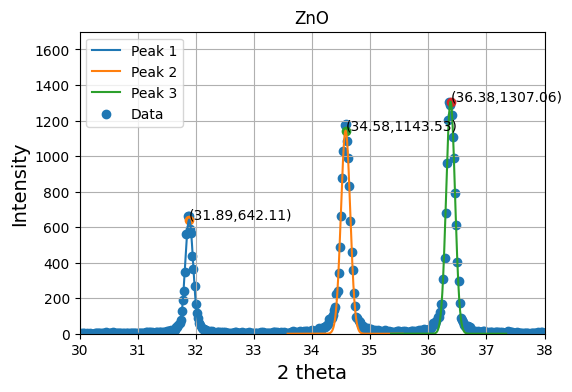

In [ ]:
ax.set_title('Xray diffraction',color='green',fontsize=20)
plt.xlabel('2 theta',fontsize=14)
plt.ylabel('Intensity',fontsize=14)


plt.scatter(Ch,c,label='Data')


plt.plot(Ch1n,c1n,label='Peak 1')
plt.scatter(Ch1n[mi1],c1n[mi1])
plt.annotate("("+str(round(Ch1n[mi1][0],2))+","+str(round(c1n[mi1][0],2))+")",[Ch1n[mi1],c1n[mi1]])


plt.plot(Ch2n,c2n,label='Peak 2')
plt.scatter(Ch2n[mi2],c2n[mi2])
plt.annotate("("+str(round(Ch2n[mi2][0],2))+","+str(round(c2n[mi2][0],2))+")",[Ch2n[mi2],c2n[mi2]])


plt.plot(Ch3n,c3n,label='Peak 3')
plt.scatter(Ch3n[mi3],c3n[mi3])
plt.annotate("("+str(round(Ch3n[mi3][0],2))+","+str(round(c3n[mi3][0],2))+")",[Ch3n[mi3],c3n[mi3]])
plt.grid(True)
plt.axis([30,38,0,1700])
plt.title("ZnO")
plt.legend()

In [ ]:
d1_0 = wavelength/(2*np.sin(np.radians(centre1/2)))
d2_0 = wavelength/(2*np.sin(np.radians(centre2/2)))
d3_0 = wavelength/(2*np.sin(np.radians(centre3/2)))
print("ZnO d1", d1_0)
print("ZnO d2", d2_0)
print("ZnO d3", d3_0)

ZnO d1 2.8032256832850755e-10
ZnO d2 2.5909579339218516e-10
ZnO d3 2.466380662865775e-10


In [ ]:
a1_0 = 2*d1_0/np.sqrt(3)
c2_0 = 2*d2_0
print(a1_0)
print(c2_0)

3.236886205687822e-10
5.181915867843703e-10


In [ ]:
fwhm_0 = [2.3548200*std1, 2.3548200*std2, 2.3548200*std3]
print(fwhm_0)
print(centre1)
print(centre2)
print(centre3)

[0.1638351449678517, 0.1871024804331092, 0.17943124597972104]
31.88631416447845
34.5774974161033
36.38352794276622


In [ ]:
t1_0 = K*wavelength/(np.radians(fwhm_0[0])*np.cos(np.radians(centre1/2)))
t2_0 = K*wavelength/(np.radians(fwhm_0[1])*np.cos(np.radians(centre2/2)))
t3_0 = K*wavelength/(np.radians(fwhm_0[2])*np.cos(np.radians(centre3/2)))
print(t1_0)
print(t2_0)
print(t3_0)

4.984956084702428e-08
4.395746933377307e-08
4.606848583975669e-08


#ZnONi(2)

[30.02, 30.04, 30.06, 30.08, 30.1, 30.12, 30.14, 30.16, 30.18, 30.2, 30.22, 30.24, 30.26, 30.28, 30.3, 30.32, 30.34, 30.36, 30.38, 30.4, 30.42, 30.44, 30.46, 30.48, 30.5, 30.52, 30.54, 30.56, 30.58, 30.6, 30.62, 30.64, 30.66, 30.68, 30.7, 30.72, 30.74, 30.76, 30.78, 30.8, 30.82, 30.84, 30.86, 30.88, 30.9, 30.92, 30.94, 30.96, 30.98, 31.0, 31.02, 31.04, 31.06, 31.08, 31.1, 31.12, 31.14, 31.16, 31.18, 31.2, 31.22, 31.24, 31.26, 31.28, 31.3, 31.32, 31.34, 31.36, 31.38, 31.4, 31.42, 31.44, 31.46, 31.48, 31.5, 31.52, 31.54, 31.56, 31.58, 31.6, 31.62, 31.64, 31.66, 31.68, 31.7, 31.72, 31.74, 31.76, 31.78, 31.8, 31.82, 31.84, 31.86, 31.88, 31.9, 31.92, 31.94, 31.96, 31.98, 32.0, 32.02, 32.04, 32.06, 32.08, 32.1, 32.12, 32.14, 32.16, 32.18, 32.2, 32.22, 32.24, 32.26, 32.28, 32.3, 32.32, 32.34, 32.36, 32.38, 32.4, 32.42, 32.44, 32.46, 32.48, 32.5, 32.52, 32.54, 32.56, 32.58, 32.6, 32.62, 32.64, 32.66, 32.68, 32.7, 32.72, 32.74, 32.76, 32.78, 32.8, 32.82, 32.84, 32.86, 32.88, 32.9, 32.92, 32.94,

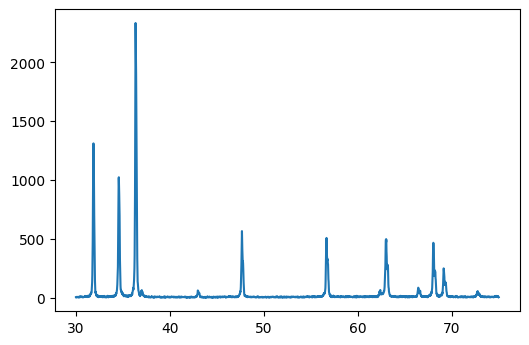

In [ ]:
Ch=np.asarray(df['2theta'])
c=np.asarray(df['znoNi2'])
print(list(Ch))
print(list(c))
plt.plot(Ch,c)

In [ ]:
mi = argrelmax(c)[0]
Chpl=[]
cp=[]
ip=[]
for i in range(0,len(mi)):
    cp.append(c[mi[i]]) 

cp.sort()
cpl=cp[len(cp)-3:len(cp)]
print(cpl)
cpl = [1311.0, 1023.0,2335.0]

for i in range(0,len(cpl)):
    j=np.where(c==cpl[i])[0][0]
    ip.append(j)
    Chpl.append(Ch[j])

[1023.0, 1311.0, 2335.0]


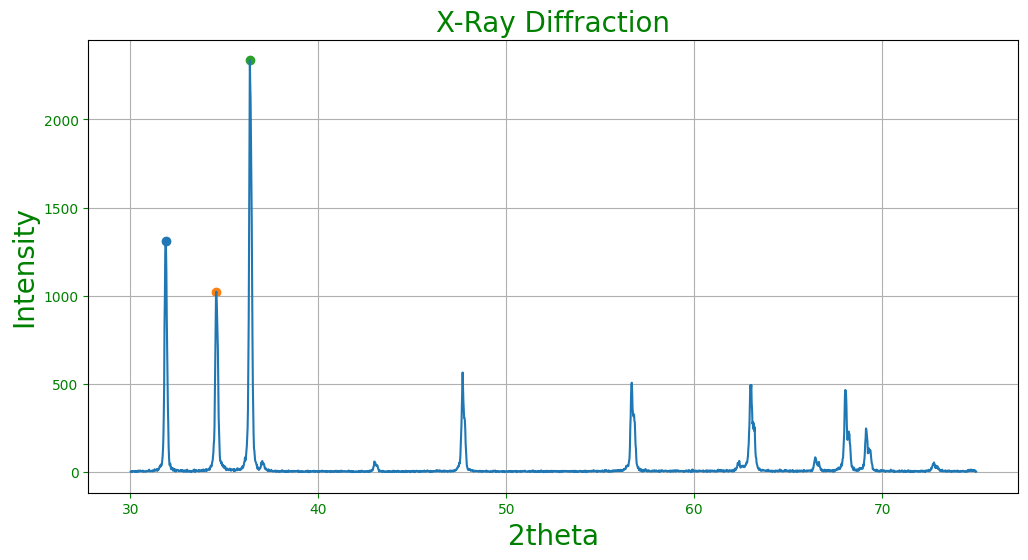

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.xaxis.label.set_color('green')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('green')          #setting up Y-axis label color to blue
ax.set_title('X-Ray Diffraction',color='green',fontsize=20)
ax.tick_params(axis='x', colors='green')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='green')  #setting up Y-axis tick color to black
plt.xlabel('2theta',fontsize=20)
plt.ylabel('Intensity',fontsize=20)
plt.plot(Ch,c)
for i in range(0, len(Chpl)):
    plt.scatter(Chpl[i],cpl[i])
plt.grid()

In [ ]:
Ch1=Ch[ip[0]-50:ip[0]+50]
c1=c[ip[0]-50:ip[0]+50]

Ch2=Ch[ip[1]-50:ip[1]+50]
c2=c[ip[1]-50:ip[1]+50]

Ch3=Ch[ip[2]-50:ip[2]+50]
c3=c[ip[2]-50:ip[2]+50]

In [ ]:
amp1,centre1,std1=fitparms(Ch1,c1)
Ch1n,c1n,mi1=fit(Ch1,c1,amp1,centre1,std1)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 64251.3812
    reduced chi-square = 662.385373
    Akaike info crit   = 652.538831
    Bayesian info crit = 660.354342
[[Variables]]
    amplitude:  220.571421 +/- 2.19430959 (0.99%) (init = 274.68)
    center:     31.8881350 +/- 7.8519e-04 (0.00%) (init = 31.89)
    sigma:      0.06835227 +/- 7.8518e-04 (1.15%) (init = 0.07)
    fwhm:       0.16095728 +/- 0.00184897 (1.15%) == '2.3548200*sigma'
    height:     1287.37898 +/- 12.8072317 (0.99%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


In [ ]:
amp2,centre2,std2=fitparms(Ch2,c2)
Ch2n,c2n,mi2=fit(Ch2,c2,amp2,centre2,std2)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 73123.6922
    reduced chi-square = 753.852497
    Akaike info crit   = 665.473751
    Bayesian info crit = 673.289262
[[Variables]]
    amplitude:  190.646347 +/- 2.45396464 (1.29%) (init = 213.99)
    center:     34.5897412 +/- 0.00111645 (0.00%) (init = 34.59)
    sigma:      0.07511611 +/- 0.00111646 (1.49%) (init = 0.07)
    fwhm:       0.17688493 +/- 0.00262905 (1.49%) == '2.3548200*sigma'
    height:     1012.52431 +/- 13.0330172 (1.29%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


In [ ]:
amp3,centre3,std3=fitparms(Ch3,c3)
Ch3n,c3n,mi3=fit(Ch3,c3,amp3,centre3,std3)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 327562.343
    reduced chi-square = 3376.93138
    Akaike info crit   = 815.426349
    Bayesian info crit = 823.241860
[[Variables]]
    amplitude:  405.318707 +/- 5.11933461 (1.26%) (init = 489.3)
    center:     36.3900169 +/- 0.00106431 (0.00%) (init = 36.39)
    sigma:      0.07297706 +/- 0.00106432 (1.46%) (init = 0.07)
    fwhm:       0.17184785 +/- 0.00250628 (1.46%) == '2.3548200*sigma'
    height:     2215.74792 +/- 27.9857495 (1.26%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


In [ ]:
PA1=quad(g,centre1-50,centre1+50,args=(centre1,std1,amp1))
PA2=quad(g,centre2-50,centre2+50,args=(centre2,std2,amp2))
PA3=quad(g,centre3-50,centre3+50,args=(centre3,std3,amp3))

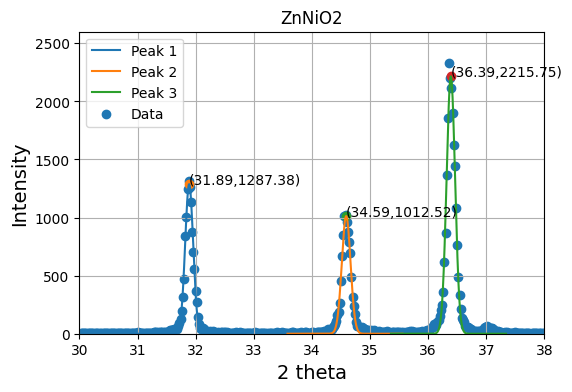

In [ ]:
ax.set_title('Xray diffraction',color='green',fontsize=20)
plt.xlabel('2 theta',fontsize=14)
plt.ylabel('Intensity',fontsize=14)
plt.title("ZnNiO2")

plt.scatter(Ch,c,label='Data')


plt.plot(Ch1n,c1n,label='Peak 1')
plt.scatter(Ch1n[mi1],c1n[mi1])
plt.annotate("("+str(round(Ch1n[mi1][0],2))+","+str(round(c1n[mi1][0],2))+")",[Ch1n[mi1],c1n[mi1]])



plt.plot(Ch2n,c2n,label='Peak 2')
plt.scatter(Ch2n[mi2],c2n[mi2])
plt.annotate("("+str(round(Ch2n[mi2][0],2))+","+str(round(c2n[mi2][0],2))+")",[Ch2n[mi2],c2n[mi2]])



plt.plot(Ch3n,c3n,label='Peak 3')
plt.scatter(Ch3n[mi3],c3n[mi3])
plt.annotate("("+str(round(Ch3n[mi3][0],2))+","+str(round(c3n[mi3][0],2))+")",[Ch3n[mi3],c3n[mi3]])
plt.grid(True)
plt.axis([30,38,0,2600])
plt.legend()

In [ ]:
d1_3 = wavelength/(2*np.sin(np.radians(centre1/2)))
d2_3 = wavelength/(2*np.sin(np.radians(centre2/2)))
d3_3 = wavelength/(2*np.sin(np.radians(centre3/2)))
print("ZnNi(2)O d1", d1_3)
print("ZnNi(2)O d2", d2_3)
print("ZnNi(2)O d3", d3_3)

ZnNi(2)O d1 2.8030697714634225e-10
ZnNi(2)O d2 2.590068819665946e-10
ZnNi(2)O d3 2.465955746601413e-10


In [ ]:
a1_3 = 2*d1_0/np.sqrt(3)
c2_3 = 2*d2_0
print(a1_3)
print(c2_3)

3.236886205687822e-10
5.181915867843703e-10


In [ ]:
fwhm_3 = [2.3548200*std1, 2.3548200*std2, 2.3548200*std3]
print(fwhm_3)
print(centre1)
print(centre2)
print(centre3)

[0.1609572815590005, 0.17688492943416198, 0.17184784955912208]
31.888134982150703
34.5897411913987
36.39001688659997


In [ ]:
t1_3 = K*wavelength/(np.radians(fwhm_0[0])*np.cos(np.radians(centre1/2)))
t2_3 = K*wavelength/(np.radians(fwhm_0[1])*np.cos(np.radians(centre2/2)))
t3_3 = K*wavelength/(np.radians(fwhm_0[2])*np.cos(np.radians(centre3/2)))
print(t1_3)
print(t2_3)
print(t3_3)

4.984978713262855e-08
4.395893148945432e-08
4.606934321333019e-08


#ZnNi(5)O

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
df=pd.read_csv("XRD Data ZnMn(6)O.txt",sep='\s+', header=None, names=['2theta','znmn(6)o'])
#print(data)
#Ch=data['2theta']
#c=data['zno'] 
#plt.axis([30,40,0,1500])
#plt.scatter(x1,y1)

In [ ]:
Ch=np.asarray(df['2theta'])
c=np.asarray(df['ZnONi5'])

In [ ]:
mi = argrelmax(c)[0]
Chpl=[]
cp=[]
ip=[]
for i in range(0,len(mi)):
    cp.append(c[mi[i]]) 
cp.sort() 
cpl=cp[len(cp)-3:len(cp)]
print(cpl)
cpl = [1387.0, 951,2227.0]
for i in range(0,len(cpl)):
    j=np.where(c==cpl[i])[0][0]
    ip.append(j)
    Chpl.append(Ch[j])

[951.0, 1387.0, 2227.0]


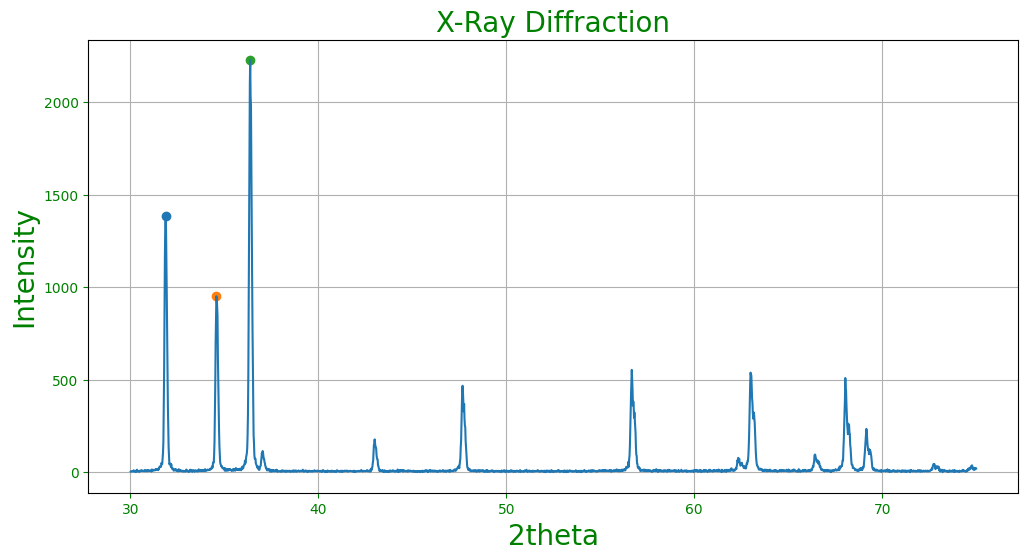

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.xaxis.label.set_color('green')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('green')          #setting up Y-axis label color to blue
ax.set_title('X-Ray Diffraction',color='green',fontsize=20)
ax.tick_params(axis='x', colors='green')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='green')  #setting up Y-axis tick color to black
plt.xlabel('2theta',fontsize=20)
plt.ylabel('Intensity',fontsize=20)
plt.plot(Ch,c)
for i in range(0, len(Chpl)):
    plt.scatter(Chpl[i],cpl[i])
plt.grid()

In [ ]:
Ch1=Ch[ip[0]-50:ip[0]+50]
c1=c[ip[0]-50:ip[0]+50]

Ch2=Ch[ip[1]-50:ip[1]+50]
c2=c[ip[1]-50:ip[1]+50]

Ch3=Ch[ip[2]-50:ip[2]+50]
c3=c[ip[2]-50:ip[2]+50]

In [ ]:
amp1,centre1,std1=fitparms(Ch1,c1)
Ch1n,c1n,mi1=fit(Ch1,c1,amp1,centre1,std1)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 54679.7841
    reduced chi-square = 563.709114
    Akaike info crit   = 636.407916
    Bayesian info crit = 644.223426
[[Variables]]
    amplitude:  228.703759 +/- 1.98935705 (0.87%) (init = 290.64)
    center:     31.8860556 +/- 6.6306e-04 (0.00%) (init = 31.89)
    sigma:      0.06601429 +/- 6.6305e-04 (1.00%) (init = 0.07)
    fwhm:       0.15545177 +/- 0.00156137 (1.00%) == '2.3548200*sigma'
    height:     1382.11903 +/- 12.0222315 (0.87%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


In [ ]:
amp2,centre2,std2=fitparms(Ch2,c2)
Ch2n,c2n,mi2=fit(Ch2,c2,amp2,centre2,std2)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 34287.7111
    reduced chi-square = 353.481558
    Akaike info crit   = 589.737211
    Bayesian info crit = 597.552721
[[Variables]]
    amplitude:  166.287820 +/- 1.60700192 (0.97%) (init = 198.87)
    center:     34.6005115 +/- 7.6659e-04 (0.00%) (init = 34.61)
    sigma:      0.06869650 +/- 7.6658e-04 (1.12%) (init = 0.07)
    fwhm:       0.16176789 +/- 0.00180517 (1.12%) == '2.3548200*sigma'
    height:     965.685981 +/- 9.33237255 (0.97%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


In [ ]:
amp3,centre3,std3=fitparms(Ch3,c3)
Ch3n,c3n,mi3=fit(Ch3,c3,amp3,centre3,std3)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 287267.190
    reduced chi-square = 2961.51743
    Akaike info crit   = 802.299785
    Bayesian info crit = 810.115296
[[Variables]]
    amplitude:  400.437268 +/- 4.80971097 (1.20%) (init = 466.2)
    center:     36.3912013 +/- 0.00101872 (0.00%) (init = 36.39)
    sigma:      0.07345234 +/- 0.00101873 (1.39%) (init = 0.07)
    fwhm:       0.17296704 +/- 0.00239893 (1.39%) == '2.3548200*sigma'
    height:     2174.89817 +/- 26.1230063 (1.20%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


In [ ]:
PA1=quad(g,centre1-50,centre1+50,args=(centre1,std1,amp1))
PA2=quad(g,centre2-50,centre2+50,args=(centre2,std2,amp2))
PA3=quad(g,centre3-50,centre3+50,args=(centre3,std3,amp3))

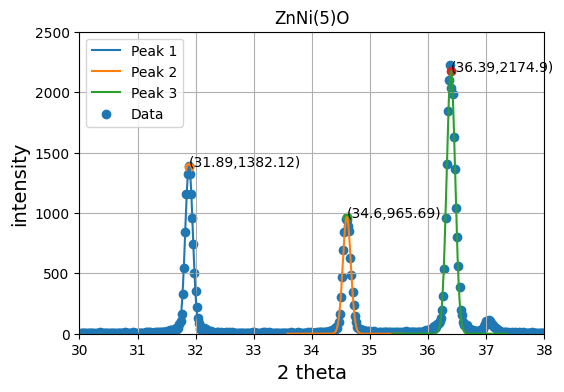

In [ ]:
ax.set_title('Xray diffraction',color='green',fontsize=20)
plt.xlabel('2 theta',fontsize=14)
plt.ylabel('intensity',fontsize=14)
plt.title("ZnNi(5)O")

plt.scatter(Ch,c,label='Data')


plt.plot(Ch1n,c1n,label='Peak 1')
plt.scatter(Ch1n[mi1],c1n[mi1])
plt.annotate("("+str(round(Ch1n[mi1][0],2))+","+str(round(c1n[mi1][0],2))+")",[Ch1n[mi1],c1n[mi1]])



plt.plot(Ch2n,c2n,label='Peak 2')
plt.scatter(Ch2n[mi2],c2n[mi2])
plt.annotate("("+str(round(Ch2n[mi2][0],2))+","+str(round(c2n[mi2][0],2))+")",[Ch2n[mi2],c2n[mi2]])



plt.plot(Ch3n,c3n,label='Peak 3')
plt.scatter(Ch3n[mi3],c3n[mi3])
plt.annotate("("+str(round(Ch3n[mi3][0],2))+","+str(round(c3n[mi3][0],2))+")",[Ch3n[mi3],c3n[mi3]])
plt.grid(True)
plt.axis([30,38,0,2500])
plt.legend()

In [ ]:
d1_6 = wavelength/(2*np.sin(np.radians(centre1/2)))
d2_6 = wavelength/(2*np.sin(np.radians(centre2/2)))
d3_6 = wavelength/(2*np.sin(np.radians(centre3/2)))
print("ZnNi(5)O d1", d1_6)
print("ZnNi(5)O d2", d2_6)
print("ZnNi(5)O d3", d3_6)

ZnNi(5)O d1 2.803247823875045e-10
ZnNi(5)O d2 2.589287232268487e-10
ZnNi(5)O d3 2.4658782016579836e-10


In [ ]:
a1_6 = 2*d1_6/np.sqrt(3)
c2_6 = 2*d2_6
print(a1_6)
print(c2_6)

3.23691177143898e-10
5.178574464536974e-10


In [ ]:
fwhm_6 = [2.3548200*std1, 2.3548200*std2, 2.3548200*std3]
print(fwhm_6)
print(centre1)
print(centre2)
print(centre3)

[0.15545176604522531, 0.16176788801754347, 0.17296704483260236]
31.886055612484267
34.60051152203687
36.39120133844347


In [ ]:
t1_6 = K*wavelength/(np.radians(fwhm_6[0])*np.cos(np.radians(centre1/2)))
t2_6 = K*wavelength/(np.radians(fwhm_6[1])*np.cos(np.radians(centre2/2)))
t3_6 = K*wavelength/(np.radians(fwhm_6[2])*np.cos(np.radians(centre3/2)))
print(t1_6)
print(t2_6)
print(t3_6)

5.2537870566335396e-08
5.084486150425514e-08
4.779122951802094e-08


#ZnNi(10)O

In [ ]:
# from google.colab import files
# uploaded=files.upload()

In [ ]:
# df=pd.read_csv("XRD Data ZnMn(10)O.txt",sep='\s+', header=None, names=['2theta','ZnONi10'])
# #print(data)
# #Ch=data['2theta']
# #c=data['zno'] 
# #plt.axis([30,40,0,1500])
# #plt.scatter(x1,y1)

In [ ]:
Ch=np.asarray(df['2theta'])
c=np.asarray(df['ZnONi10'])

In [ ]:
#@title
mi = argrelmax(c)[0]
Chpl=[]
cp=[]
ip=[]
for i in range(0,len(mi)):
    cp.append(c[mi[i]]) 
cp.sort() 
cpl=cp[len(cp)-3:len(cp)]
print(cpl)
cpl = [1261.0, 839,1840.0]

for i in range(0,len(cpl)):
    j=np.where(c==cpl[i])[0][0]
    ip.append(j)
    Chpl.append(Ch[j])

[839.0, 1261.0, 1840.0]


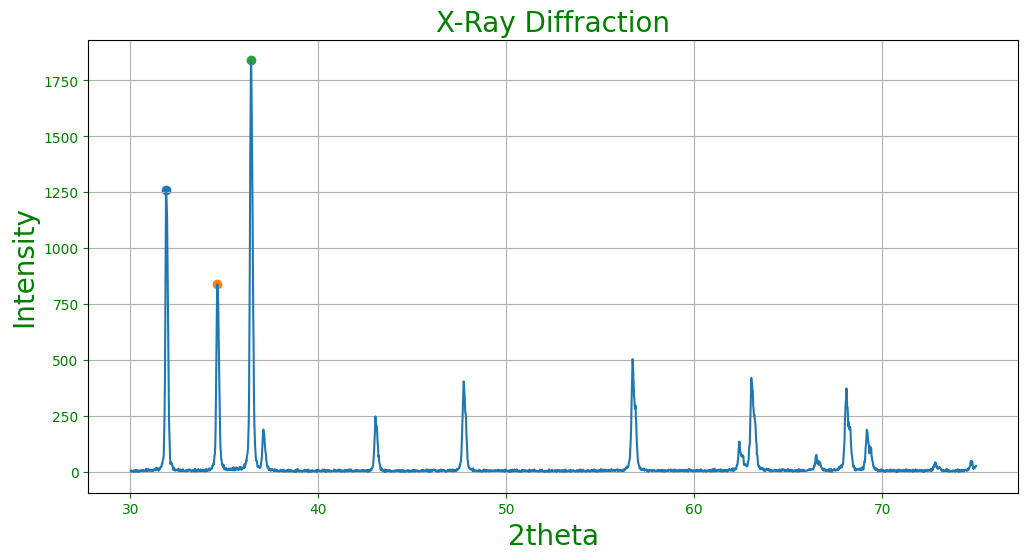

In [ ]:
#@title
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.xaxis.label.set_color('green')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('green')          #setting up Y-axis label color to blue
ax.set_title('X-Ray Diffraction',color='green',fontsize=20)
ax.tick_params(axis='x', colors='green')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='green')  #setting up Y-axis tick color to black
plt.xlabel('2theta',fontsize=20)
plt.ylabel('Intensity',fontsize=20)
plt.plot(Ch,c)
for i in range(0, len(Chpl)):
    plt.scatter(Chpl[i],cpl[i])
plt.grid()

In [ ]:
#@title
Ch1=Ch[ip[0]-50:ip[0]+50]
c1=c[ip[0]-50:ip[0]+50]

Ch2=Ch[ip[1]-50:ip[1]+50]
c2=c[ip[1]-50:ip[1]+50]

Ch3=Ch[ip[2]-50:ip[2]+50]
c3=c[ip[2]-50:ip[2]+50]

In [ ]:
#@title
amp1,centre1,std1=fitparms(Ch1,c1)
Ch1n,c1n,mi1=fit(Ch1,c1,amp1,centre1,std1)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 80032.1015
    reduced chi-square = 825.073212
    Akaike info crit   = 674.501292
    Bayesian info crit = 682.316802
[[Variables]]
    amplitude:  212.415586 +/- 2.42376889 (1.14%) (init = 263.97)
    center:     31.9333181 +/- 8.8214e-04 (0.00%) (init = 31.93)
    sigma:      0.06695193 +/- 8.8214e-04 (1.32%) (init = 0.07)
    fwhm:       0.15765974 +/- 0.00207728 (1.32%) == '2.3548200*sigma'
    height:     1265.70754 +/- 14.4423622 (1.14%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


In [ ]:
#@title
amp2,centre2,std2=fitparms(Ch2,c2)
Ch2n,c2n,mi2=fit(Ch2,c2,amp2,centre2,std2)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 100
    # variables        = 3
    chi-square         = 43827.5881
    reduced chi-square = 451.830805
    Akaike info crit   = 614.284858
    Bayesian info crit = 622.100368
[[Variables]]
    amplitude:  150.357935 +/- 1.84550593 (1.23%) (init = 175.56)
    center:     34.6481133 +/- 0.00100458 (0.00%) (init = 34.65)
    sigma:      0.07087985 +/- 0.00100457 (1.42%) (init = 0.07)
    fwhm:       0.16690929 +/- 0.00236559 (1.42%) == '2.3548200*sigma'
    height:     846.279168 +/- 10.3873061 (1.23%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


In [ ]:
#@title
amp3,centre3,std3=fitparms(Ch3,c3)
Ch3n,c3n,mi3=fit(Ch3,c3,amp3,centre3,std3)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 100
    # variables        = 3
    chi-square         = 390473.825
    reduced chi-square = 4025.50335
    Akaike info crit   = 832.994603
    Bayesian info crit = 840.810114
[[Variables]]
    amplitude:  327.295811 +/- 5.60714765 (1.71%) (init = 439.92)
    center:     36.4390306 +/- 0.00145280 (0.00%) (init = 36.44)
    sigma:      0.07344032 +/- 0.00145280 (1.98%) (init = 0.08)
    fwhm:       0.17293872 +/- 0.00342108 (1.98%) == '2.3548200*sigma'
    height:     1777.93550 +/- 30.4591385 (1.71%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


In [ ]:
#@title
PA1=quad(g,centre1-50,centre1+50,args=(centre1,std1,amp1))
PA2=quad(g,centre2-50,centre2+50,args=(centre2,std2,amp2))
PA3=quad(g,centre3-50,centre3+50,args=(centre3,std3,amp3))

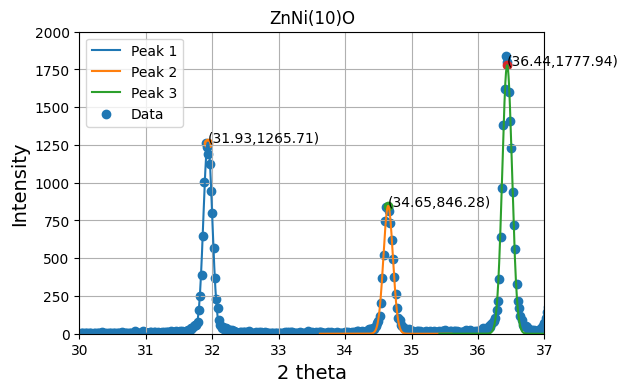

In [ ]:
#@title
ax.set_title('Xray diffraction',color='green',fontsize=20)
plt.xlabel('2 theta',fontsize=14)
plt.ylabel('Intensity',fontsize=14)
plt.title("ZnNi(10)O")

plt.scatter(Ch,c,label='Data')


plt.plot(Ch1n,c1n,label='Peak 1')
plt.scatter(Ch1n[mi1],c1n[mi1])
plt.annotate("("+str(round(Ch1n[mi1][0],2))+","+str(round(c1n[mi1][0],2))+")",[Ch1n[mi1],c1n[mi1]])


plt.plot(Ch2n,c2n,label='Peak 2')
plt.scatter(Ch2n[mi2],c2n[mi2])
plt.annotate("("+str(round(Ch2n[mi2][0],2))+","+str(round(c2n[mi2][0],2))+")",[Ch2n[mi2],c2n[mi2]])


plt.plot(Ch3n,c3n,label='Peak 3')
plt.scatter(Ch3n[mi3],c3n[mi3])
plt.annotate("("+str(round(Ch3n[mi3][0],2))+","+str(round(c3n[mi3][0],2))+")",[Ch3n[mi3],c3n[mi3]])
plt.grid(True)
plt.axis([30,37,0,2000])
plt.legend()

In [ ]:
d1_10 = wavelength/(2*np.sin(np.radians(centre1/2)))
d2_10 = wavelength/(2*np.sin(np.radians(centre2/2)))
d3_10 = wavelength/(2*np.sin(np.radians(centre3/2)))
print("ZnNi(10)O d1", d1_10)
print("ZnNi(10)O d2", d2_10)
print("ZnNi(10)O d3", d3_10)

ZnNi(10)O d1 2.7992066302425374e-10
ZnNi(10)O d2 2.5858387553108304e-10
ZnNi(10)O d3 2.462751154965811e-10


In [ ]:
a1_10 = 2*d1_10/np.sqrt(3)
c2_10 = 2*d2_10
print(a1_10)
print(c2_10)

3.2322454029758283e-10
5.171677510621661e-10


In [ ]:
fwhm_10 = [2.3548200*std1, 2.3548200*std2, 2.3548200*std3]
print(fwhm_10)
print(centre1)
print(centre2)
print(centre3)

[0.1576597426187771, 0.16690928816652573, 0.17293872296838267]
31.93331813812579
34.64811329681726
36.43903058954638


In [ ]:
t1_10 = K*wavelength/(np.radians(fwhm_10[0])*np.cos(np.radians(centre1/2)))
t2_10 = K*wavelength/(np.radians(fwhm_10[1])*np.cos(np.radians(centre2/2)))
t3_10 = K*wavelength/(np.radians(fwhm_10[2])*np.cos(np.radians(centre3/2)))
print(t1_10)
print(t2_10)
print(t3_10)

5.180820230412445e-08
4.928503984250681e-08
4.780561905752334e-08


# Final Graphs

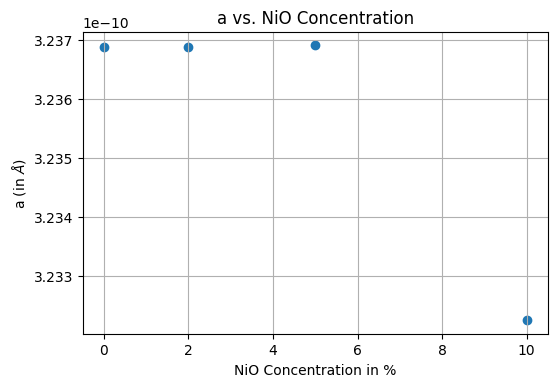

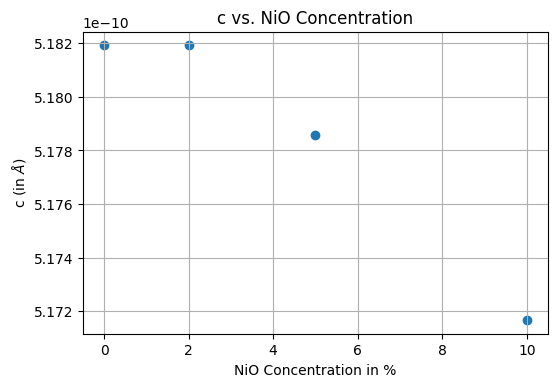

In [ ]:
x_new = np.linspace(0, 10, 50)
a = [3.236886205687822e-10,3.236886205687822e-10,3.23691177143898e-10,3.2322454029758283e-10 ]
plt.scatter(mnconc, a)
bspline = interpolate.make_interp_spline(mnconc, a)
y_new = bspline(x_new)
# plt.plot(x_new, y_new, 'g')
plt.title("a vs. NiO Concentration")
plt.xlabel("NiO Concentration in %")
plt.ylabel("a (in $\AA$)")
plt.grid()
plt.show()
print("")

c = [5.181915867843703e-10,5.181915867843703e-10 ,5.178574464536974e-10,5.171677510621661e-10]
plt.scatter(mnconc, c)
bspline = interpolate.make_interp_spline(mnconc, c)
y_new = bspline(x_new)
# plt.plot(x_new, y_new, 'g')
plt.title("c vs. NiO Concentration")
plt.xlabel("NiO Concentration in %")
plt.ylabel("c (in $\AA$)")
plt.grid()
plt.show()
print("")

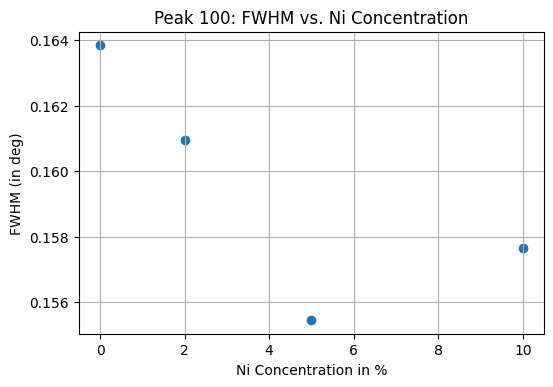

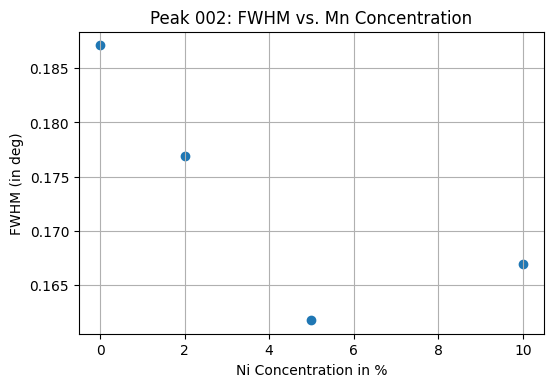

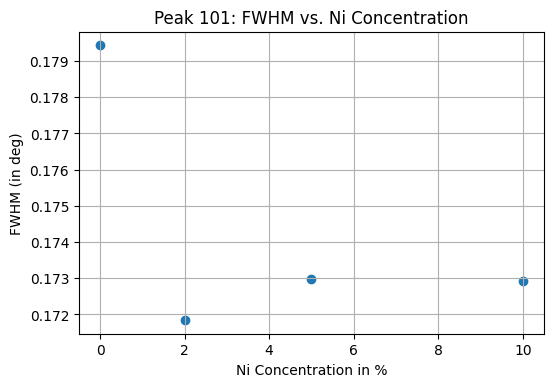

In [ ]:
peak100fwhm = [0.1638351449678517,0.1609572815590005,0.15545176604522531,0.1576597426187771] 
plt.scatter(mnconc, peak100fwhm)
x_new = np.linspace(0, 10, 50)
bspline = interpolate.make_interp_spline(mnconc, peak100fwhm)
y_new = bspline(x_new)
# plt.plot(x_new, y_new, 'g')
plt.title("Peak 100: FWHM vs. Ni Concentration")
plt.xlabel("Ni Concentration in %")
plt.ylabel("FWHM (in deg)")
plt.grid()
plt.show()
print("")

peak002fwhm = [0.1871024804331092,0.17688492943416198,0.16176788801754347,0.16690928816652573]
plt.scatter(mnconc, peak002fwhm)
bspline = interpolate.make_interp_spline(mnconc, peak002fwhm)
y_new = bspline(x_new)
# plt.plot(x_new, y_new, 'g')
plt.title("Peak 002: FWHM vs. Mn Concentration")
plt.xlabel("Ni Concentration in %")
plt.ylabel("FWHM (in deg)")
plt.grid()
plt.show()
print("")

peak101fwhm = [0.17943124597972104,0.17184784955912208, 0.1729670448326023,0.17293872296838267]
plt.scatter(mnconc, peak101fwhm)
bspline = interpolate.make_interp_spline(mnconc, peak101fwhm)
y_new = bspline(x_new)
# plt.plot(x_new, y_new, 'g')
plt.title("Peak 101: FWHM vs. Ni Concentration")
plt.xlabel("Ni Concentration in %")
plt.ylabel("FWHM (in deg)")
plt.grid()
plt.show()

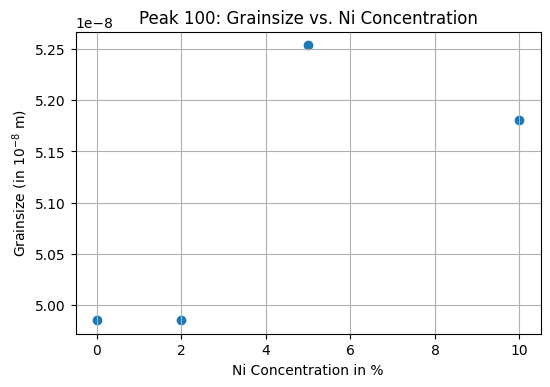

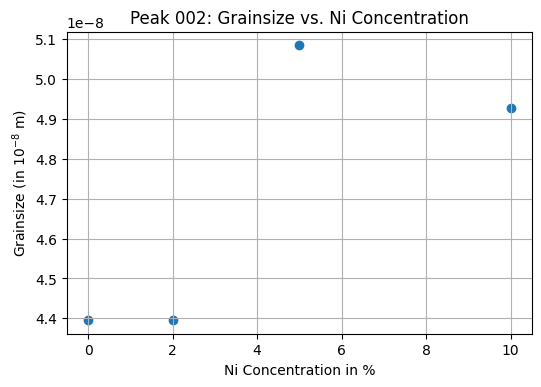

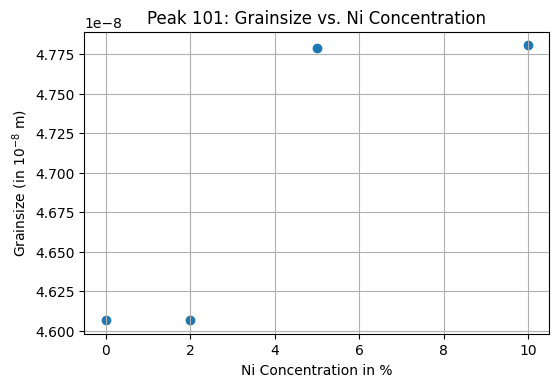

In [ ]:
x_new = np.linspace(0, 10, 50)

peak100grain = [4.984956084702428e-08,4.984978713262855e-08,5.2537870566335396e-08,5.180820230412445e-08]
plt.scatter(mnconc, peak100grain)
bspline = interpolate.make_interp_spline(mnconc, peak100grain)
y_new = bspline(x_new)
# plt.plot(x_new, y_new, 'g')
plt.title("Peak 100: Grainsize vs. Ni Concentration")
plt.xlabel("Ni Concentration in %")
plt.ylabel("Grainsize (in $10^{-8}$ m)")
plt.grid()
plt.show()

peak002grain = [4.395746933377307e-08,4.395893148945432e-08,5.084486150425514e-08,4.928503984250681e-08]
plt.scatter(mnconc, peak002grain)
bspline = interpolate.make_interp_spline(mnconc, peak002grain)
y_new = bspline(x_new)
# plt.plot(x_new, y_new, 'g')
plt.title("Peak 002: Grainsize vs. Ni Concentration")
plt.xlabel("Ni Concentration in %")
plt.ylabel("Grainsize (in $10^{-8}$ m)")
plt.grid()
plt.show()

peak101grain = [4.606848583975669e-08 ,4.606934321333019e-08,4.779122951802094e-08 ,4.780561905752334e-08]
plt.scatter(mnconc, peak101grain)
bspline = interpolate.make_interp_spline(mnconc, peak101grain)
y_new = bspline(x_new)
# plt.plot(x_new, y_new, 'g')
plt.title("Peak 101: Grainsize vs. Ni Concentration")
plt.xlabel("Ni Concentration in %")
plt.ylabel("Grainsize (in $10^{-8}$ m)")
plt.grid()
plt.show()

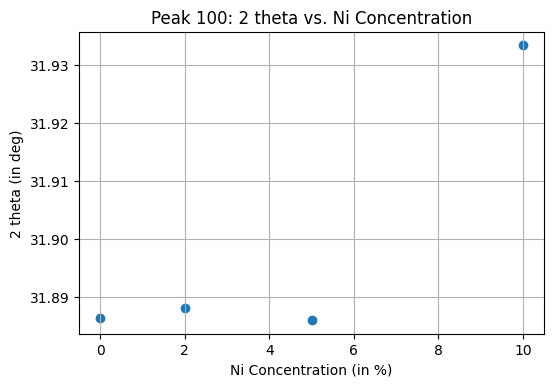

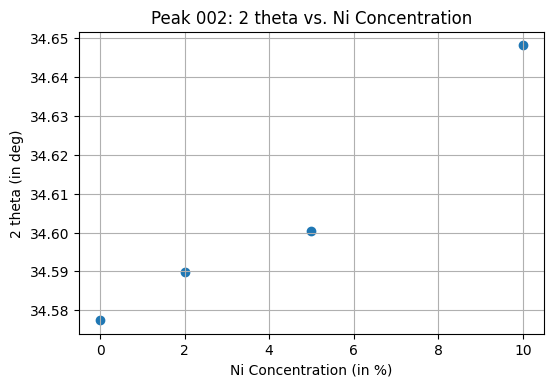

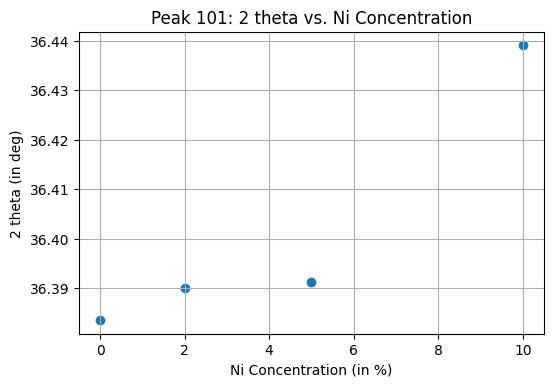

In [ ]:
x_new = np.linspace(0, 10, 50)

peak100theta2 = [31.88631416447845,31.888134982150703,31.886055612484267,31.93331813812579]
plt.scatter(mnconc, peak100theta2)
bspline = interpolate.make_interp_spline(mnconc, peak100theta2)
y_new = bspline(x_new)
# plt.plot(x_new, y_new, 'g')
plt.title("Peak 100: 2 theta vs. Ni Concentration")
plt.xlabel("Ni Concentration (in %)")
plt.ylabel("2 theta (in deg)")
plt.grid()
plt.show()

peak002theta2 = [34.5774974161033,34.5897411913987,34.60051152203687,34.64811329681726]
plt.scatter(mnconc, peak002theta2)
bspline = interpolate.make_interp_spline(mnconc, peak002theta2)
y_new = bspline(x_new)
# plt.plot(x_new, y_new, 'g')
plt.title("Peak 002: 2 theta vs. Ni Concentration")
plt.xlabel("Ni Concentration (in %)")
plt.ylabel("2 theta (in deg)")
plt.grid()
plt.show()

peak101theta2 = [36.38352794276622,36.39001688659997,36.39120133844347,36.43903058954638]
plt.scatter(mnconc, peak101theta2)
bspline = interpolate.make_interp_spline(mnconc, peak101theta2)
y_new = bspline(x_new)
# plt.plot(x_new, y_new, 'g')
plt.title("Peak 101: 2 theta vs. Ni Concentration")
plt.xlabel("Ni Concentration (in %)")
plt.ylabel("2 theta (in deg)")
plt.grid()
plt.show()